# Modelo 1: Regresión Logística



## 1. PREPROCESAMIENTO

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [42]:
# Cargar dataset
df = pd.read_csv('../datasets/telco_churn.csv')
print('Dataset Original:')
print(f'Dimensiones: {df.shape}')
print(f'\nPrimeras filas:')
print(df.head())
print(f'\nTipos de datos:')
print(df.dtypes)

Dataset Original:
Dimensiones: (10, 21)

Primeras filas:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  Tec

In [43]:
# Limpieza: Convertir TotalCharges a numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df_clean = df.dropna()

print(f'Filas removidas por NaN: {df.shape[0] - df_clean.shape[0]}')
print(f'Dataset después de limpieza: {df_clean.shape}')
print(f'\nValores faltantes: {df_clean.isnull().sum().sum()}')

Filas removidas por NaN: 0
Dataset después de limpieza: (10, 21)

Valores faltantes: 0


In [44]:
# Codificación de variables categóricas
df_encoded = df_clean.copy()
label_encoders = {}

categorical_cols = df_encoded.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

print(f'Columnas categóricas codificadas: {list(categorical_cols)}')
print(f'\nDataset codificado:')
print(df_encoded.head())

Columnas categóricas codificadas: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Dataset codificado:
   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           5       0              0        1           0       1   
1           2       1              0        0           0      34   
2           1       1              0        0           0       2   
3           6       1              0        0           0      45   
4           8       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               1  ...   
2             1              0                0    

In [45]:
# Separar features y target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

print(f'Features (X): {X.shape}')
print(f'Target (y): {y.shape}')
print(f'\nDistribución del target:')
print(y.value_counts())
print(f'\nProporción (%):')
print(y.value_counts(normalize=True) * 100)

Features (X): (10, 20)
Target (y): (10,)

Distribución del target:
Churn
0    6
1    4
Name: count, dtype: int64

Proporción (%):
Churn
0    60.0
1    40.0
Name: proportion, dtype: float64


In [46]:
# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print('Estadísticas después de normalización:')
print(f'Media: {X_scaled.mean(axis=0)[:5]} (primeras 5 features)')
print(f'Desv. Estándar: {X_scaled.std(axis=0)[:5]} (primeras 5 features)')

Estadísticas después de normalización:
Media: [ 1.11022302e-17  0.00000000e+00  0.00000000e+00 -1.66533454e-17
 -2.22044605e-17] (primeras 5 features)
Desv. Estándar: [1. 1. 0. 1. 1.] (primeras 5 features)


In [47]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print('Conjuntos de datos:')
print(f'Entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0] / len(X_scaled) * 100:.1f}%)')
print(f'Prueba: {X_test.shape[0]} muestras ({X_test.shape[0] / len(X_scaled) * 100:.1f}%)')
print(f'\nDistribución en entrenamiento:')
print(pd.Series(y_train).value_counts())
print(f'\nDistribución en prueba:')
print(pd.Series(y_test).value_counts())

Conjuntos de datos:
Entrenamiento: 8 muestras (80.0%)
Prueba: 2 muestras (20.0%)

Distribución en entrenamiento:
Churn
0    5
1    3
Name: count, dtype: int64

Distribución en prueba:
Churn
0    1
1    1
Name: count, dtype: int64


## 2. ENTRENAMIENTO

In [48]:
from sklearn.linear_model import LogisticRegression

# Entrenar modelo
lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    solver='lbfgs',
    class_weight='balanced'
)

lr_model.fit(X_train, y_train)
print('Modelo Logistic Regression entrenado exitosamente!')
print(f'\nParámetros del modelo:')
print(f'- Solver: lbfgs')
print(f'- Max iterations: 1000')
print(f'- Class weight: balanced')

Modelo Logistic Regression entrenado exitosamente!

Parámetros del modelo:
- Solver: lbfgs
- Max iterations: 1000
- Class weight: balanced


In [49]:
# Hacer predicciones
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)
y_test_proba = lr_model.predict_proba(X_test)[:, 1]

print('Predicciones generadas:')
print(f'Entrenamiento: {len(y_train_pred)} predicciones')
print(f'Prueba: {len(y_test_pred)} predicciones')
print(f'Probabilidades: {len(y_test_proba)} probabilidades')

Predicciones generadas:
Entrenamiento: 8 predicciones
Prueba: 2 predicciones
Probabilidades: 2 probabilidades


## 3. RESULTADOS

In [50]:
# Predicciones en detalle
print('PREDICCIONES EN ENTRENAMIENTO:')
print(f'Distribucion: {np.bincount(y_train_pred)}')
print(f'Clase 0 (No Churn): {np.sum(y_train_pred == 0)}')
print(f'Clase 1 (Churn): {np.sum(y_train_pred == 1)}')

print('\nPREDICCIONES EN PRUEBA:')
print(f'Distribucion: {np.bincount(y_test_pred)}')
print(f'Clase 0 (No Churn): {np.sum(y_test_pred == 0)}')
print(f'Clase 1 (Churn): {np.sum(y_test_pred == 1)}')

PREDICCIONES EN ENTRENAMIENTO:
Distribucion: [5 3]
Clase 0 (No Churn): 5
Clase 1 (Churn): 3

PREDICCIONES EN PRUEBA:
Distribucion: [1 1]
Clase 0 (No Churn): 1
Clase 1 (Churn): 1


In [51]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
print('MATRIZ DE CONFUSIÓN (Prueba):')
print(cm)
print(f'\nInterpretación:')
print(f'- Verdaderos Negativos (TN): {cm[0, 0]}')
print(f'- Falsos Positivos (FP): {cm[0, 1]}')
print(f'- Falsos Negativos (FN): {cm[1, 0]}')
print(f'- Verdaderos Positivos (TP): {cm[1, 1]}')

MATRIZ DE CONFUSIÓN (Prueba):
[[0 1]
 [1 0]]

Interpretación:
- Verdaderos Negativos (TN): 0
- Falsos Positivos (FP): 1
- Falsos Negativos (FN): 1
- Verdaderos Positivos (TP): 0


## 4. MÉTRICAS

In [52]:
# Calcular todas las métricas
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_proba)

print('='*50)
print('MÉTRICAS DEL MODELO LOGISTIC REGRESSION')
print('='*50)
print(f'\nACCURACY (Exactitud):')
print(f'  - Entrenamiento: {train_acc:.4f} ({train_acc*100:.2f}%)')
print(f'  - Prueba: {test_acc:.4f} ({test_acc*100:.2f}%)')
print(f'\nPRECISION: {precision:.4f}')
print(f'  → De los que predijo Churn, {precision*100:.2f}% realmente tuvieron Churn')
print(f'\nRECALL (Sensibilidad): {recall:.4f}')
print(f'  → Detectó {recall*100:.2f}% de los Churn reales')
print(f'\nF1-SCORE: {f1:.4f}')
print(f'  → Balance entre Precision y Recall')
print(f'\nROC-AUC: {auc:.4f}')
print(f'  → Probabilidad de clasificar correctamente')

MÉTRICAS DEL MODELO LOGISTIC REGRESSION

ACCURACY (Exactitud):
  - Entrenamiento: 1.0000 (100.00%)
  - Prueba: 0.0000 (0.00%)

PRECISION: 0.0000
  → De los que predijo Churn, 0.00% realmente tuvieron Churn

RECALL (Sensibilidad): 0.0000
  → Detectó 0.00% de los Churn reales

F1-SCORE: 0.0000
  → Balance entre Precision y Recall

ROC-AUC: 0.0000
  → Probabilidad de clasificar correctamente


In [53]:
# Classification Report
print('\nCLASSIFICATION REPORT DETALLADO:')
print('='*50)
report = classification_report(y_test, y_test_pred, target_names=['No Churn', 'Churn'])
print(report)


CLASSIFICATION REPORT DETALLADO:
              precision    recall  f1-score   support

    No Churn       0.00      0.00      0.00       1.0
       Churn       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



In [54]:
# Resumen de métricas
metrics_summary = {
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Valor': [test_acc, precision, recall, f1, auc],
    'Porcentaje': [f'{test_acc*100:.2f}%', f'{precision*100:.2f}%', f'{recall*100:.2f}%', f'{f1*100:.2f}%', f'{auc*100:.2f}%']
}

metrics_df = pd.DataFrame(metrics_summary)
print('\nTABLA RESUMEN DE MÉTRICAS:')
print(metrics_df.to_string(index=False))


TABLA RESUMEN DE MÉTRICAS:
  Métrica  Valor Porcentaje
 Accuracy    0.0      0.00%
Precision    0.0      0.00%
   Recall    0.0      0.00%
 F1-Score    0.0      0.00%
  ROC-AUC    0.0      0.00%


## 5. GRÁFICAS

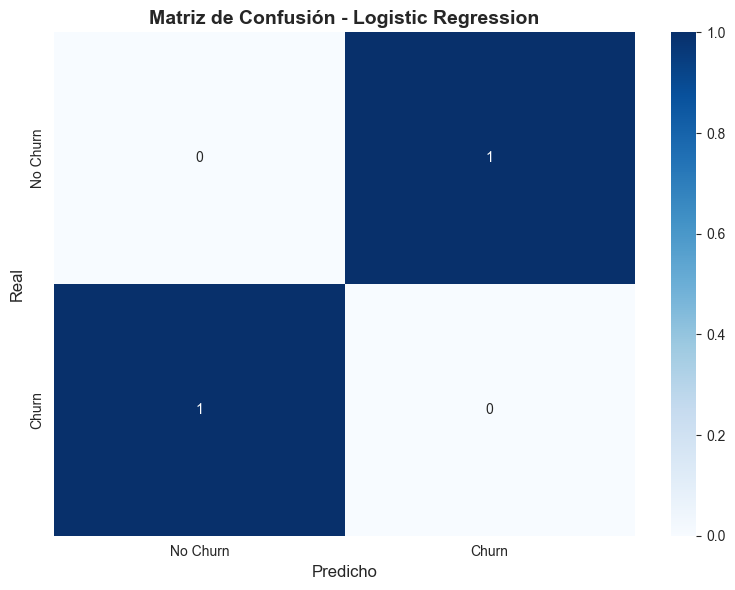

In [55]:
# Gráfica 1: Matriz de Confusión
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'],
            cbar=True, ax=ax)
ax.set_title('Matriz de Confusión - Logistic Regression', fontsize=14, fontweight='bold')
ax.set_ylabel('Real', fontsize=12)
ax.set_xlabel('Predicho', fontsize=12)
plt.tight_layout()
plt.show()

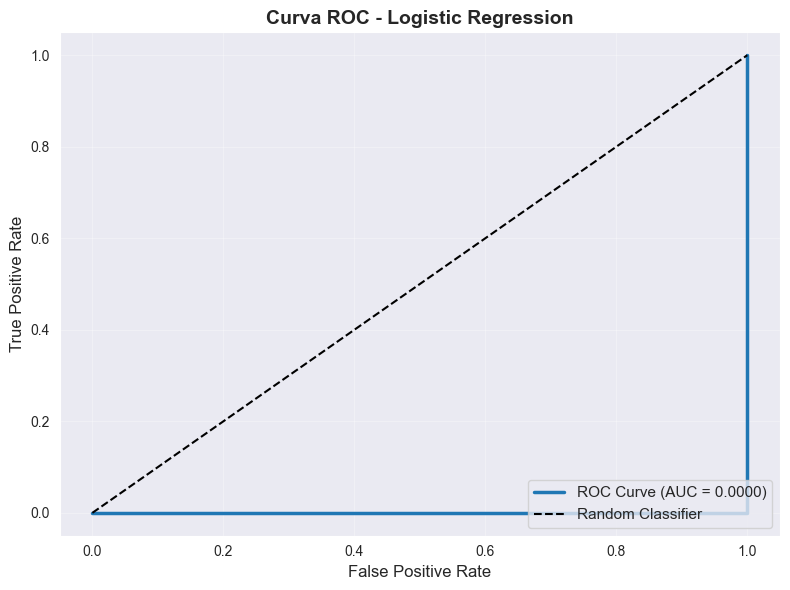

In [56]:
# Gráfica 2: Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_test_proba)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(fpr, tpr, linewidth=2.5, label=f'ROC Curve (AUC = {auc:.4f})', color='#1f77b4')
ax.plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random Classifier')
ax.fill_between(fpr, tpr, alpha=0.2, color='#1f77b4')
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_title('Curva ROC - Logistic Regression', fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=11)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

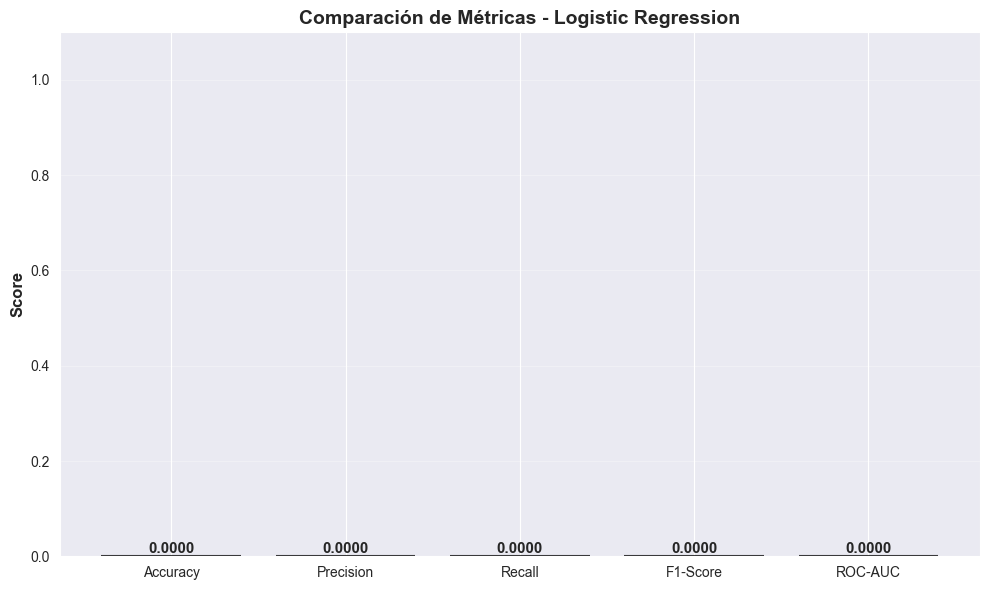

In [57]:
# Gráfica 3: Comparación de Métricas
fig, ax = plt.subplots(figsize=(10, 6))
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
metrics_values = [test_acc, precision, recall, f1, auc]
colors = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12', '#9b59b6']

bars = ax.bar(metrics_names, metrics_values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

# Añadir valores en las barras
for bar, value in zip(bars, metrics_values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{value:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

ax.set_ylim(0, 1.1)
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Comparación de Métricas - Logistic Regression', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

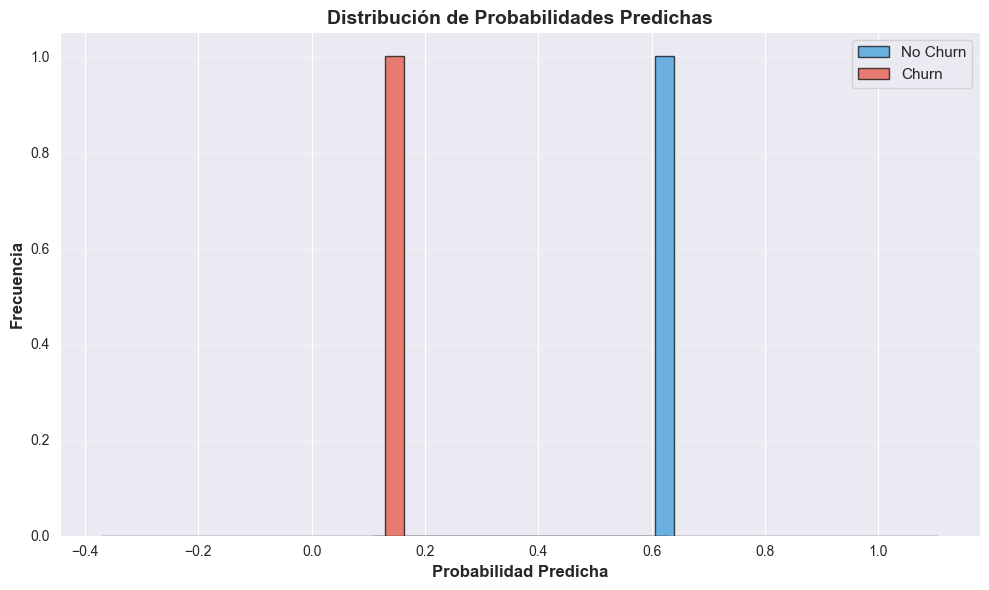

In [58]:
# Gráfica 4: Distribución de Probabilidades
fig, ax = plt.subplots(figsize=(10, 6))

# Histogramas por clase
no_churn_probs = y_test_proba[y_test == 0]
churn_probs = y_test_proba[y_test == 1]

ax.hist(no_churn_probs, bins=30, alpha=0.7, label='No Churn', color='#3498db', edgecolor='black')
ax.hist(churn_probs, bins=30, alpha=0.7, label='Churn', color='#e74c3c', edgecolor='black')

ax.set_xlabel('Probabilidad Predicha', fontsize=12, fontweight='bold')
ax.set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
ax.set_title('Distribución de Probabilidades Predichas', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

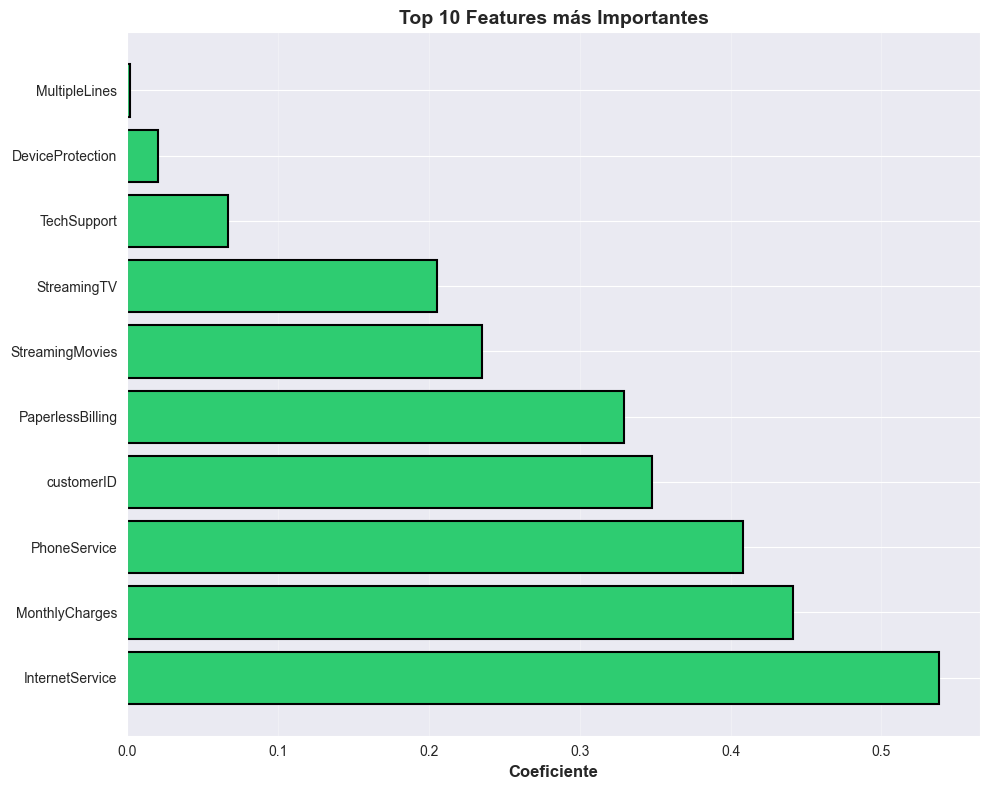

In [59]:
# Gráfica 5: Feature Importance (Coeficientes)
fig, ax = plt.subplots(figsize=(10, 8))

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coeficiente': lr_model.coef_[0]
}).sort_values('Coeficiente', ascending=False)

# Top 10
top_features = feature_importance.head(10)
colors_feat = ['#2ecc71' if x > 0 else '#e74c3c' for x in top_features['Coeficiente']]

ax.barh(top_features['Feature'], top_features['Coeficiente'], color=colors_feat, edgecolor='black', linewidth=1.5)
ax.set_xlabel('Coeficiente', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Features más Importantes', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [60]:
# Guardar modelo
import joblib

joblib.dump(lr_model, '../public/models/logistic_regression.pkl')
joblib.dump(scaler, '../public/models/logistic_regression_scaler.pkl')

print('Modelo guardado exitosamente!')
print(f'- Modelo: ../public/models/logistic_regression.pkl')
print(f'- Scaler: ../public/models/logistic_regression_scaler.pkl')

Modelo guardado exitosamente!
- Modelo: ../public/models/logistic_regression.pkl
- Scaler: ../public/models/logistic_regression_scaler.pkl
